# space_invariant_blur

In [2]:
#importing libraries like numpy, pillow, matplotlib,  symbolic computation
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import math
from sympy import symbols

In [3]:
#opening the image.
Mandrill=Image.open('Mandrill.png')

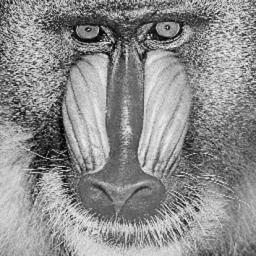

In [4]:
#image
Mandrill

In [6]:
#image matrix
F_matrix=np.array(Mandrill)

In [7]:
#displaying image matrix
F_matrix

array([[135,  60, 148, ..., 116, 146, 171],
       [ 90,  66, 114, ..., 135, 132,  82],
       [ 99, 146,  79, ...,  92,  87,  98],
       ...,
       [118, 162, 176, ..., 104, 101, 102],
       [133, 167, 159, ...,  97,  98, 103],
       [166, 160, 126, ...,  95,  91,  92]], dtype=uint8)

In [8]:
#finding the shape of the image matrix.
M,N=F_matrix.shape

In [10]:
#size of the image matrix
M,N

(256, 256)

### H matrix finding (Kernel)

In [20]:
#sigma value.
sigma=1.2

In [21]:
# this code used to find the Gaussian kernel for the given sigma value of size ⌈6*sigma+1]*⌈6*sigma+1⌉.
if sigma==0:
    n=math.ceil(6*sigma+1)
    x=int((n-1)/2)
    hmn_=np.array(1)
else:
    n=math.ceil(6*sigma+1)
    if n%2==0:
        n=n+1
    else:
        n=n
    x=int((n-1)/2)
    hmn=[]
    for a in range(-x,x+1):
        for b in range(-x,x+1):
            fn=((2*math.pi*(sigma**2))**-1)*math.exp(-0.5*((a**2+b**2)/(sigma**2)))
            hmn.append(fn)
    hmn=np.array(hmn)
    hmn=hmn.reshape(n,n)
    tmp=0
    for c in range(x-1):
        tmp=hmn[c,:]
        hmn[c,:]=hmn[n-1-c,:]
        hmn[n-1-c,:]=tmp
    hmn_=np.ravel(hmn)


#Final code

In [22]:
#new matrix of image size
G_matrix=np.zeros((M,N))

In [23]:
# new matrix
G_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
# this code performs the blurring of the image using above kernel.
for i in range(M):
    for j in range(N):
        F=[]
        h=[]
        for i_ in range(i-x,i+x+1):
            for j_ in range(j-x,j+x+1):
                if i_<0 or j_<0 or i_>=M or j_>=N:
                    F.append(0)
                    h.append(0)
                else:
                    F.append(F_matrix[i_,j_])
                    h.append(1)
        F=np.array(F)
        h=np.array(h)
        total=np.dot(h,hmn_)
        H=hmn_
        H=(H/total)
        G_matrix[i,j]=np.dot(F,H)

In [25]:
#blurred image matrix
G_matrix

array([[ 99.93445342,  97.4062725 ,  94.38796134, ..., 127.28870047,
        128.61530197, 130.06761903],
       [ 98.35588361,  97.2216846 ,  92.60842004, ..., 119.97972426,
        118.85007269, 119.53480782],
       [ 96.13996161,  97.99883991,  92.46080174, ..., 112.88921791,
        111.85332689, 116.58551954],
       ...,
       [148.39094285, 153.55333247, 156.41720399, ..., 101.37073744,
         99.39278157,  96.86874709],
       [149.39772893, 152.50100017, 152.71225639, ...,  97.01609751,
         97.71412227,  97.54592871],
       [152.4570332 , 151.78703532, 149.0876503 , ...,  94.03608744,
         95.57932843,  96.09498969]])

In [26]:
#This code shows the final blurred image.
Final_image = Image.fromarray(G_matrix)
Final_image.show()